In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random as rd
from scipy.spatial.distance import cdist

# Exercise 1 , 2 and 3

In [2]:
class KMeans(object):

    def __init__(self, df, K):
        self.data = df.values
        self.x_label = df.columns[0]
        self.y_label = df.columns[1]
        self.K = K                      # num clusters
        self.m = self.data.shape[0]     # num training examples
        self.n = self.data.shape[1]     # num of features
        self.result = {}
        self.centroids = np.array([]).reshape(self.n, 0)

    def init_random_centroids(self, data, K):
        temp_centroids = np.array([]).reshape(self.n, 0)
        for i in range(self.K):
            rand = rd.randint(0, self.m-1)
            temp_centroids = np.c_[temp_centroids, self.data[rand]]

        return temp_centroids


    def fit_model(self, num_iter):
        # Initiate centroids randomly
        self.centroids = self.init_random_centroids(self.data, self.K)
        # Begin iterations to update centroids, compute and update Euclidean distances
        for i in range(num_iter):
            EucDist = np.array([]).reshape(self.m, 0)
            for k in range(self.K):
                dist = np.sum((self.data - self.centroids[:,k])**2, axis=1)
                EucDist = np.c_[EucDist, dist]
            min_dist = np.argmin(EucDist, axis=1) + 1
            soln_temp = {} 

            for k in range(self.K):
                soln_temp[k+1] = np.array([]).reshape(self.n, 0)

            for i in range(self.m):
                soln_temp[min_dist[i]] = np.c_[soln_temp[min_dist[i]], self.data[i]]

            for k in range(self.K):
                soln_temp[k+1] = soln_temp[k+1].T

            for k in range(self.K):
                self.centroids[:,k] = np.mean(soln_temp[k+1], axis=0)

            self.result = soln_temp

    def plot_kmeans(self):
        labels = ['cluster_' + str(i+1) for i in range(self.K)]
        fig1 = plt.figure(figsize=(5,5))
        ax1 = plt.subplot(111)
        # plot each cluster
        for k in range(self.K):
                ax1.scatter(self.result[k+1][:,0], self.result[k+1][:,1]
                                        , label = labels[k])
        # plot centroids
        ax1.scatter(self.centroids[0,:], self.centroids[1,:], #alpha=.5,
                                s = 150, c = 'black', label = 'centroids')
        plt.xlabel(self.x_label) # first column of df
        plt.ylabel(self.y_label) # second column of df
        plt.title('Plot of K Means Clustering Algorithm')
        plt.legend()

        return plt.show(block=True)


    def predict(self):
        return self.result, self.centroids.T


    def plot_elbow(self):
        wcss_vals = np.array([])
        for k_val in range(1, self.K):
            results, centroids = self.predict()
            wcss=0
            for k in range(k_val):
                wcss += np.sum((results[k+1] - centroids[k,:])**2)
            wcss_vals = np.append(wcss_vals, wcss)
        # Plot K values vs WCSS values
        K_vals = np.arange(1, self.K)
        plt.plot(K_vals, wcss_vals)
        plt.xlabel('K Values')
        plt.title('Elbow Method')

        return plt.show(block=True)

In [3]:
X1, y1 = make_blobs(n_samples=500, n_features=2, centers = 3, random_state=10)
df1 = pd.DataFrame(dict(x=X1[:,0], y=X1[:,1]))

In [4]:
X2, y2 = make_blobs(n_samples=150, n_features=2, centers=5, random_state=420)
df2 = pd.DataFrame(dict(x=X2[:,0], y=X2[:,1]))

In [5]:
X3, y3 = make_blobs(n_samples=150, n_features=2, centers=7, random_state=42069)
df3 = pd.DataFrame(dict(x=X3[:,0], y=X3[:,1]))

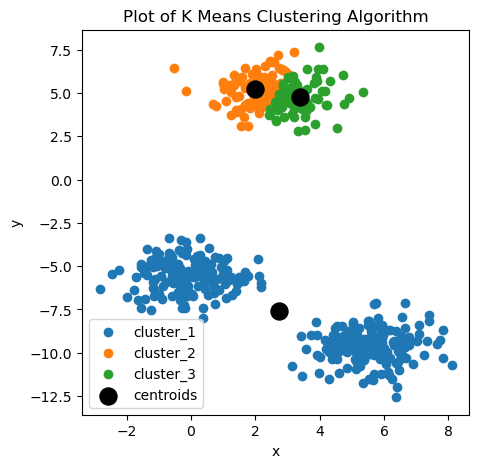

In [6]:
kmeans = KMeans(df1, 3)
kmeans.fit_model(300)
kmeans.plot_kmeans()
results, centroids = kmeans.predict()

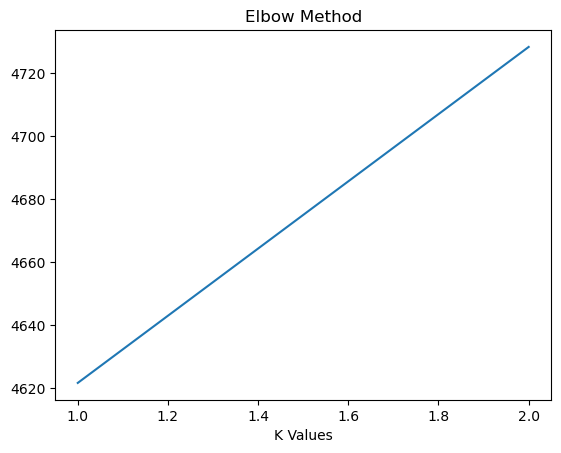

In [7]:
kmeans.plot_elbow()

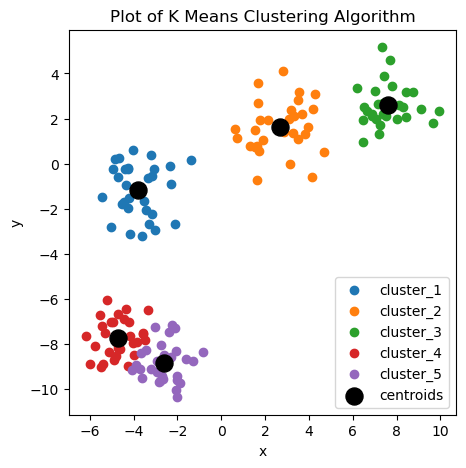

In [8]:
kmeans = KMeans(df2, 5)
kmeans.fit_model(300)
kmeans.plot_kmeans()
results, centroids = kmeans.predict()

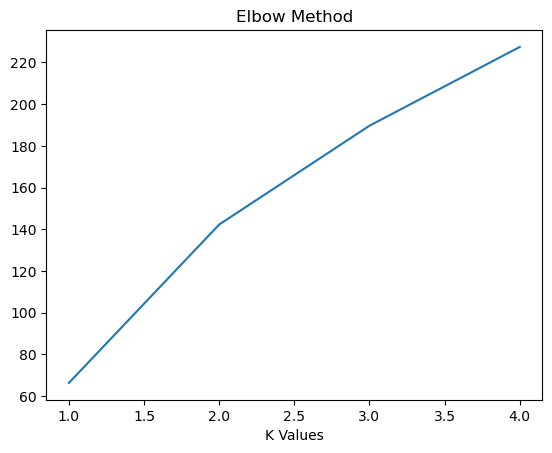

In [9]:
kmeans.plot_elbow()

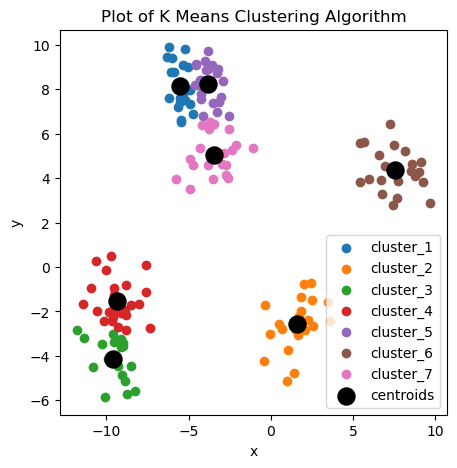

In [10]:
kmeans = KMeans(df3, 7)
kmeans.fit_model(300)
kmeans.plot_kmeans()
results, centroids = kmeans.predict()

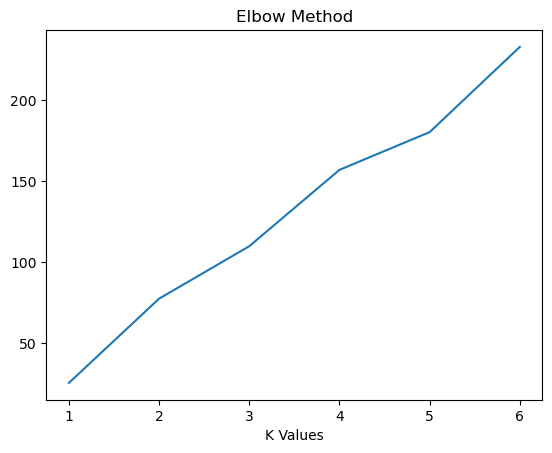

In [11]:
kmeans.plot_elbow()

# Exercise 4

## Example 1 of Kmeans producing bad results: Wrong number of clusters

## Despite having distinct clusters in the data, we underestimated their number. As a consequence, some disjoint groups of data are forced to fit into one larger cluster.

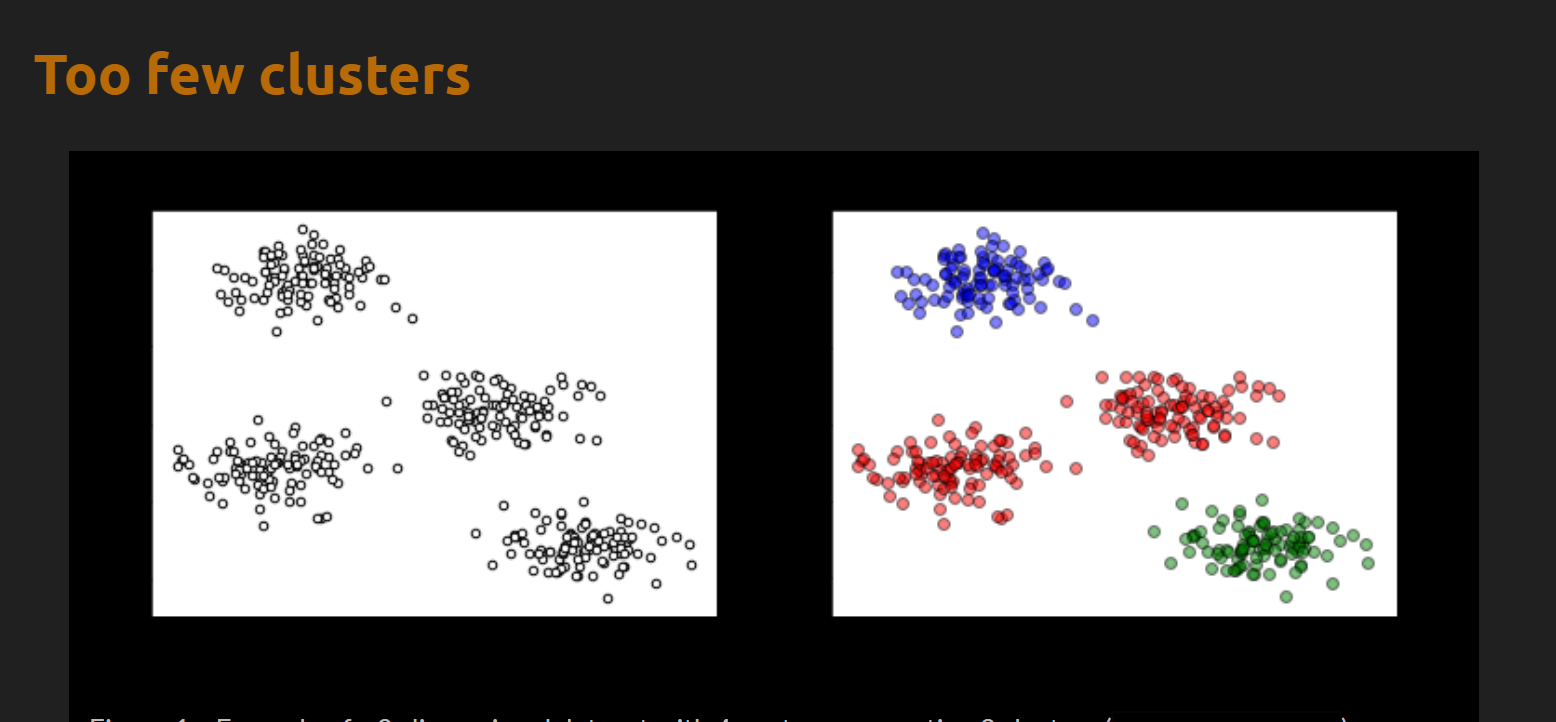

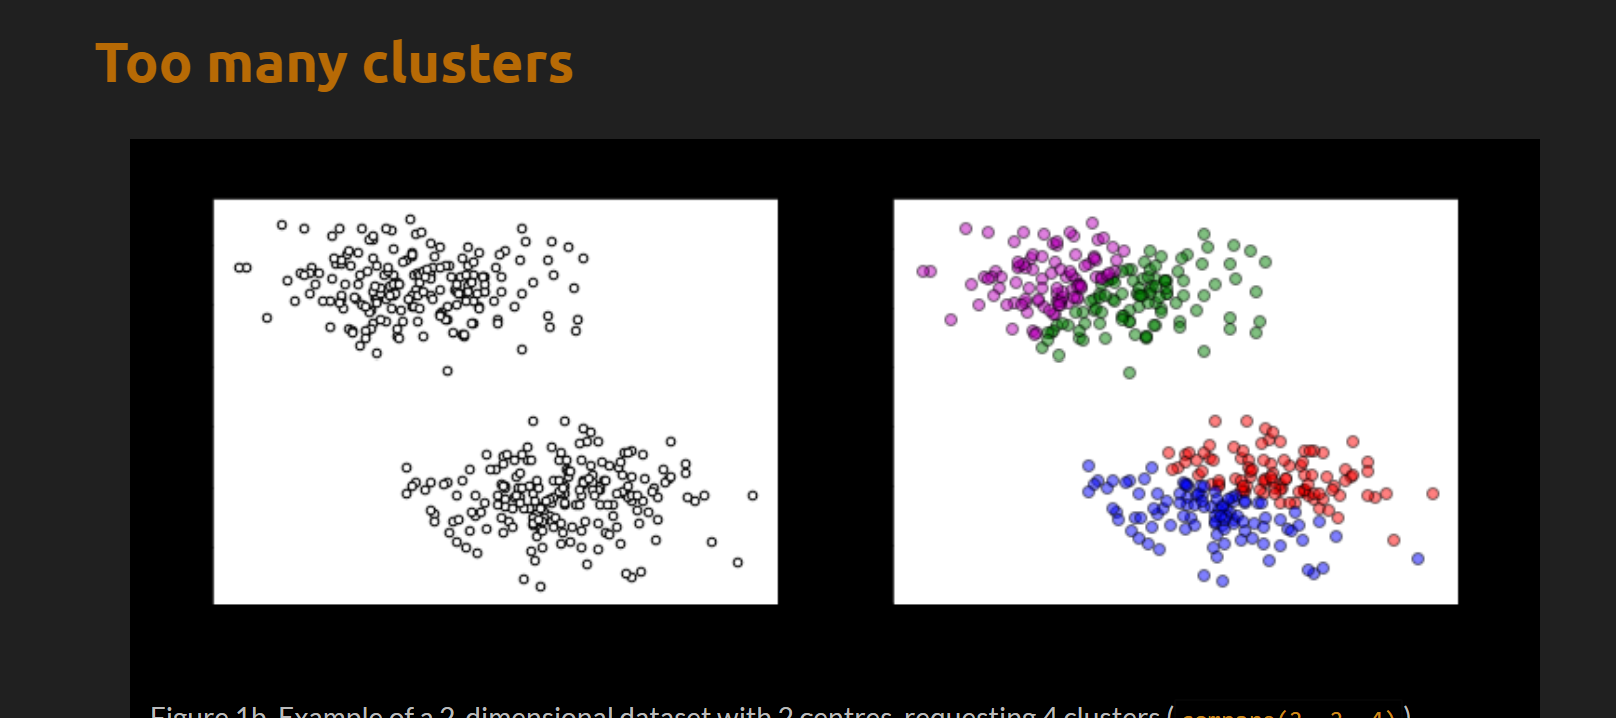

## In contrary to the last situation, trying to wrap the data into too many clusters creates artificial boundaries within real data clusters.

## Example 2 of Kmeans producing bad results: High(er) dimensional data

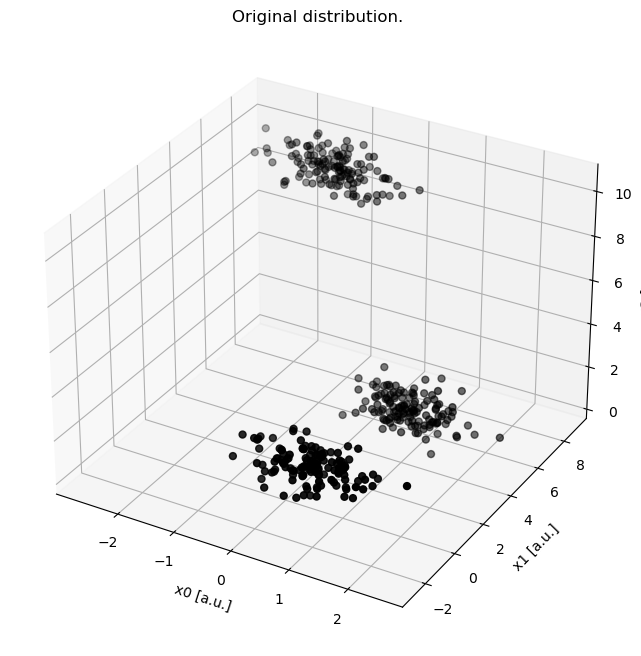

In [12]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

data, targets = make_blobs(
    n_samples=400,
    n_features=3,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0)

ax.scatter(data[:, 0], data[:, 1], 
    zs=data[:, 2], zdir='z', s=25, c='black', depthshade=True)
ax.set_xlabel('x0 [a.u.]')
ax.set_ylabel('x1 [a.u.]')
ax.set_zlabel('x2 [a.u.]')
ax.set_title('Original distribution.')
plt.grid()
plt.show()

## Although there are infinitely many ways we can project this 3D dataset onto 2D, there are three primary orthogonal sub-spaces:

## -x0 : x1
## -x1 : x2
## -x2 : x0
## Looking at the x2 : x0 projection, the dataset looks like as if it only had two clusters. The lower-right “supercluster” is, in fact, two distinct groups and even if we guess K right (K = 3), it looks like an apparent error, despite the clusters are very localized.

## Example 3 of Kmeans producing bad results: Irregular datasets

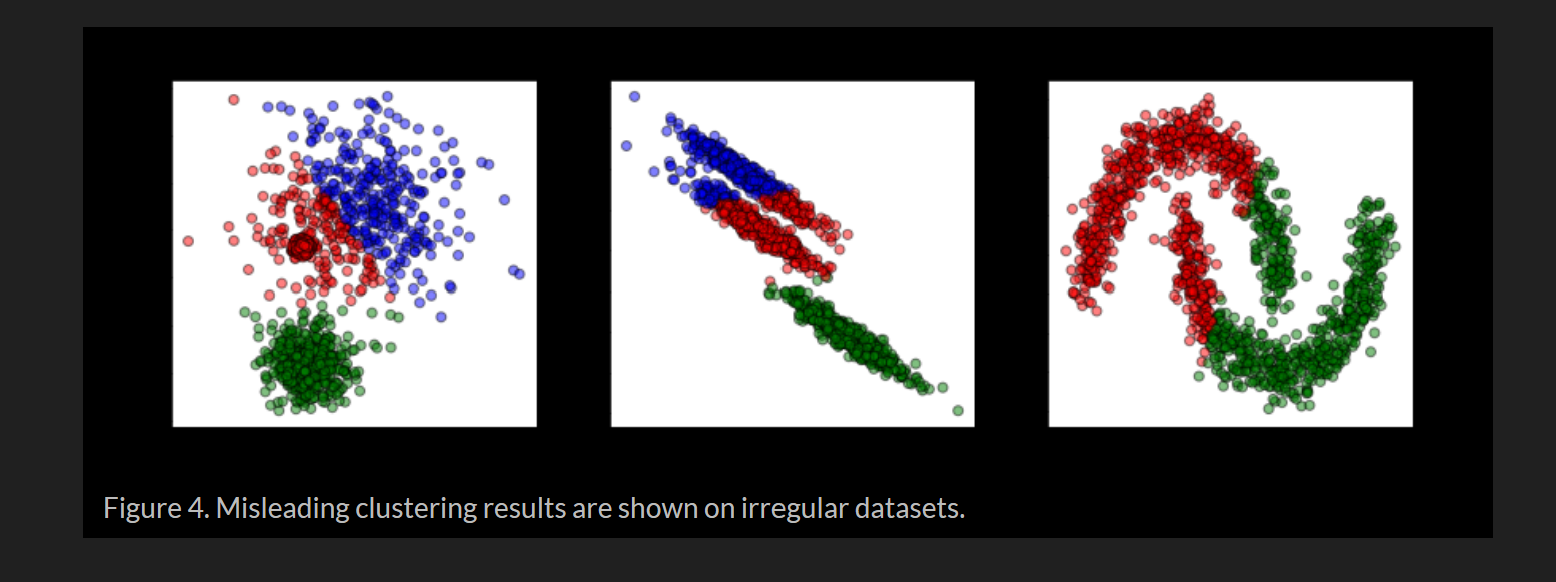

## The left graph shows data whose distribution although, Gaussian, does not have equal standard deviation. The middle graph presents anisotropic data, meaning data that is elongated along a specific axis. Finally, the right graph shows data that is completely non-Gaussian, despite organized in clear clusters.